# 과제7

코드 튜토리얼에 사용된 모델들은 분류 뿐만 아니라 회귀도 가능하다. 다음과 같이 회귀를 사용해보자.

4주차 튜토리얼에 사용된 California Housing data를 다시 사용해보자

- **MedInc**: Median income in block group.
- **HouseAge**: Median age of the houses in block group.
- **AveRooms**: Average number of rooms per household.
- **AveBedrms**: Average number of bedrooms per household.
- **Population**: Block group population.
- **AveOccup**: Average number of household members.
- **Latitude**: Latitude of the block group centroid.
- **Longitude**: Longitude of the block group centroid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

In [2]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [3]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Q1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [4]:
y = housing_df['MedHouseVal']
x = housing_df.drop('MedHouseVal', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

# Q2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train, y_train)
pred = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, pred)
print(mse)


0.2553684927247781


# Q3 데이터를 `AdaBoostRegressor`에 적합해봅시다.

위와 동일

In [6]:
from sklearn.ensemble import AdaBoostRegressor

rf_reg = AdaBoostRegressor(random_state=42)
rf_reg.fit(x_train, y_train)
pred = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, pred)
print(mse)


0.614478459432694


# Q4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

rf_reg = GradientBoostingRegressor(random_state=42)
rf_reg.fit(x_train, y_train)
pred = rf_reg.predict(x_test)
mse = mean_squared_error(y_test, pred)
print(mse)


0.2939973248643864


# Q5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다.

Documentation

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시

https://www.geeksforgeeks.org/regression-using-lightgbm/


In [10]:
import lightgbm as lgb

train_data = lgb.Dataset(x_train, label = y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

params = { 
    'objective': 'regression', 
    'metric': 'mse', 
    'boosting_type': 'gbdt', 
    'num_leaves': 31, 
    'learning_rate': 0.05, 
    'feature_fraction': 0.8, 
}

gbm = lgb.train(params, train_data, valid_sets=[test_data])
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
mse = mean_squared_error(y_test, y_pred)
print(mse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
0.2290413561236371


# Q6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [11]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',  
    n_estimators=100,              
    learning_rate=0.1,             
    max_depth=5,                   
    random_state=42                
)

xg_reg.fit(x_train, y_train)

# 예측
y_pred = xg_reg.predict(x_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.2435998341534843


# Q7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

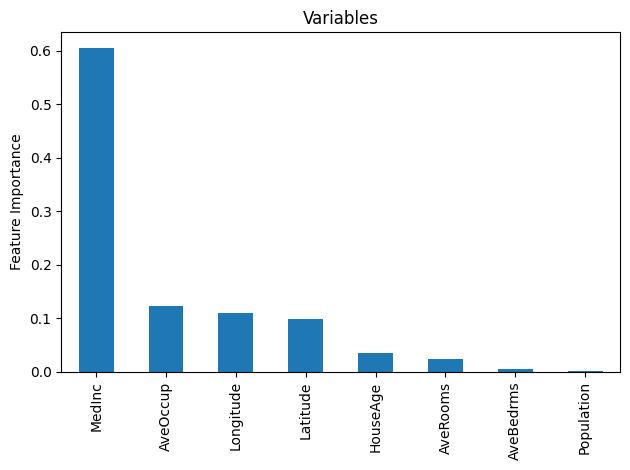

In [26]:
importances = rf_reg.feature_importances_
std = np.std([rf_reg.feature_importances_ for tree in rf_reg.estimators_], axis=0)

forest_importances = pd.Series(importances, index= housing_df.drop(columns=['MedHouseVal']).columns)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Variables")
ax.set_ylabel("Feature Importance")
fig.tight_layout()
